In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from transformers import TextClassificationPipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
train_data = pd.read_csv('https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/test.csv')


/opt/homebrew/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


In [4]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=77)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
classification_pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer, framework='pt')

In [15]:
texts = test_data['text'].tolist()  
predictions = classification_pipeline(texts)

In [16]:
print(predictions)


[{'label': 'LABEL_56', 'score': 0.026998959481716156}, {'label': 'LABEL_56', 'score': 0.02507968619465828}, {'label': 'LABEL_61', 'score': 0.02712366171181202}, {'label': 'LABEL_56', 'score': 0.02710520662367344}, {'label': 'LABEL_20', 'score': 0.026052871719002724}, {'label': 'LABEL_56', 'score': 0.02627892792224884}, {'label': 'LABEL_56', 'score': 0.026096493005752563}, {'label': 'LABEL_20', 'score': 0.02588794194161892}, {'label': 'LABEL_68', 'score': 0.026764053851366043}, {'label': 'LABEL_56', 'score': 0.02764093689620495}, {'label': 'LABEL_56', 'score': 0.026552679017186165}, {'label': 'LABEL_56', 'score': 0.027325328439474106}, {'label': 'LABEL_61', 'score': 0.028279634192585945}, {'label': 'LABEL_56', 'score': 0.026014383882284164}, {'label': 'LABEL_61', 'score': 0.028889520093798637}, {'label': 'LABEL_61', 'score': 0.02768237702548504}, {'label': 'LABEL_56', 'score': 0.027397990226745605}, {'label': 'LABEL_56', 'score': 0.027812043204903603}, {'label': 'LABEL_56', 'score': 0.0

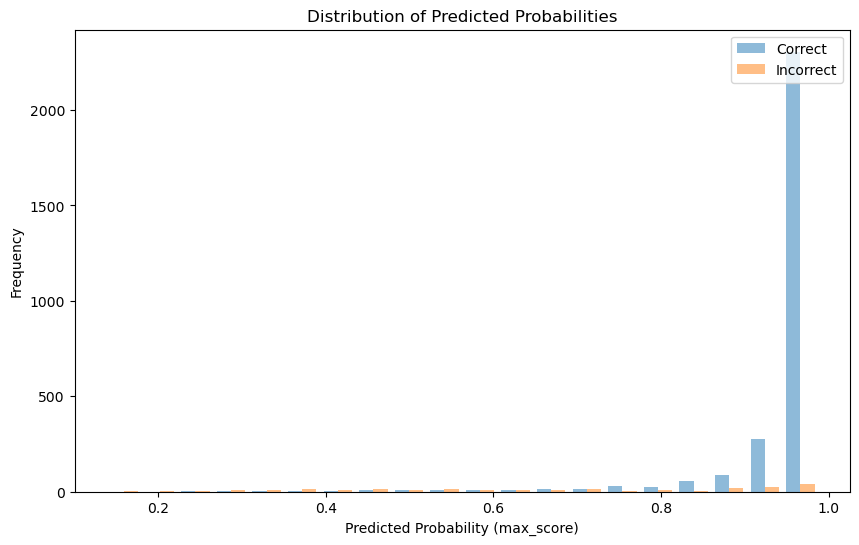

In [44]:
# Assuming 'predicted_labels' contains the predicted categories that you need to compare with 'category' from test_data
predicted_labels = [pred['label'] for pred in predictions]  # Adjust this if necessary to match the categories

# Extract actual categories from the test data
actual_categories = test_data['category'].tolist()

# Determine correctness
data = pd.read_csv('data/correct_or_not.csv')

# Filtering correct and incorrect predictions
correct_scores = data[data['correct'] == 1]['max_score']
incorrect_scores = data[data['correct'] == 0]['max_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([correct_scores, incorrect_scores], bins=20, alpha=0.5, label=['Correct', 'Incorrect'])
plt.xlabel('Predicted Probability (max_score)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Predicted Probabilities')
plt.show()

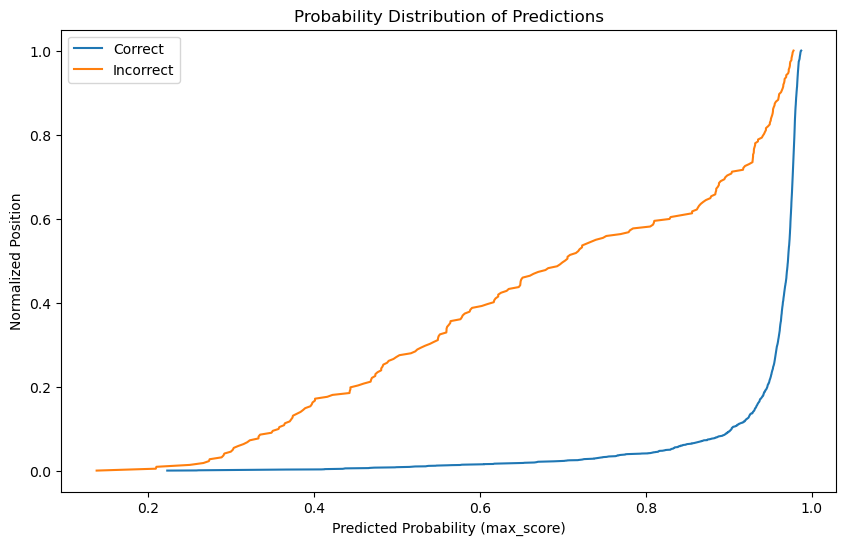

In [38]:
# Sort by 'max_score'
data_sorted = data.sort_values(by='max_score')

# Identify correct and incorrect predictions
correct_data = data_sorted[data_sorted['correct'] == 1]['max_score']
incorrect_data = data_sorted[data_sorted['correct'] == 0]['max_score']

# Generate a normalized range to plot against the scores
x_correct = np.arange(len(correct_data)) / (len(correct_data) - 1)
x_incorrect = np.arange(len(incorrect_data)) / (len(incorrect_data) - 1)

plt.figure(figsize=(10, 6))

# Plotting
plt.plot(correct_data.values, x_correct, label='Correct')
plt.plot(incorrect_data.values, x_incorrect, label='Incorrect')

plt.xlabel('Predicted Probability (max_score)')
plt.ylabel('Normalized Position')
plt.title('Probability Distribution of Predictions')
plt.legend()

plt.show()

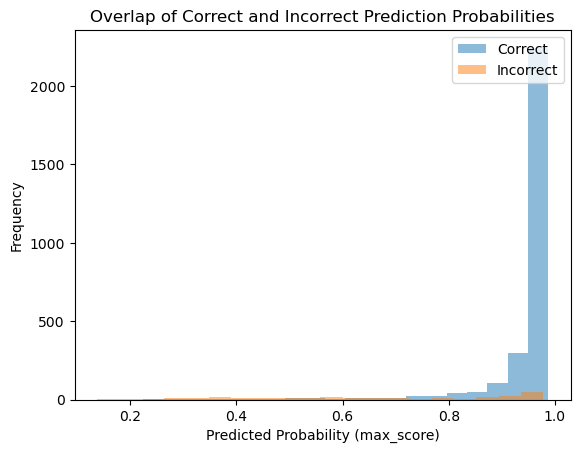

In [39]:
plt.hist(correct_scores, bins=20, alpha=0.5, label='Correct')
plt.hist(incorrect_scores, bins=20, alpha=0.5, label='Incorrect')
plt.xlabel('Predicted Probability (max_score)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Overlap of Correct and Incorrect Prediction Probabilities')
plt.show()

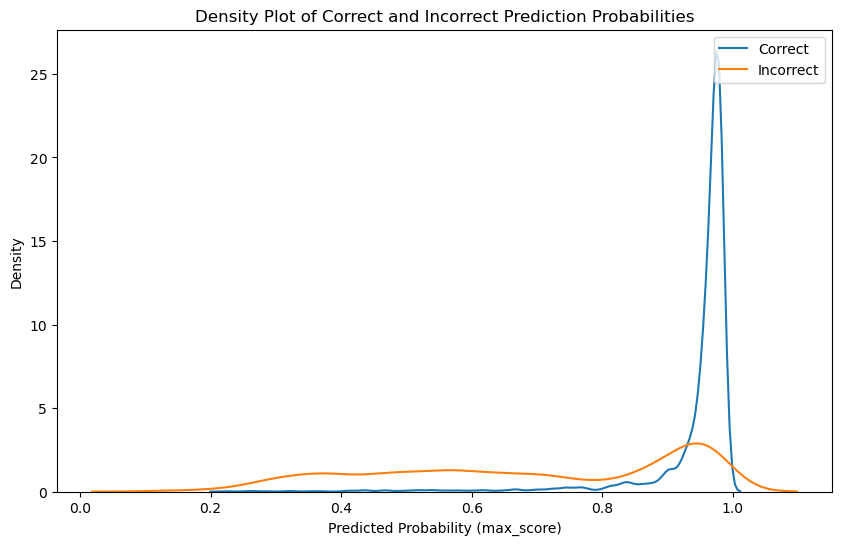

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Density Plot (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(correct_scores, label="Correct", bw_adjust=0.5)
sns.kdeplot(incorrect_scores, label="Incorrect", bw_adjust=0.5)

plt.xlabel('Predicted Probability (max_score)')
plt.ylabel('Density')
plt.title('Density Plot of Correct and Incorrect Prediction Probabilities')
plt.legend(loc='upper right')
plt.show()
